In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

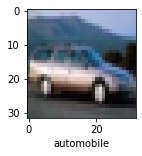

In [10]:
plot_sample(X_train, y_train, 4)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4741 - accuracy: 0.4711
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1189 - accuracy: 0.6073
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9754 - accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8857 - accuracy: 0.6924
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8076 - accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7512 - accuracy: 0.7390
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6938 - accuracy: 0.7595
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6513 - accuracy: 0.7726
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6056 - accuracy: 0.7892
Epoch 10/10
1563/1563 [==============================] - 65s 42m

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9246 - accuracy: 0.7062


[0.924612820148468, 0.7062000036239624]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.14941795e-04, 1.54874346e-03, 8.05018842e-03, 8.08622539e-01,
        1.34635338e-04, 5.75359687e-02, 1.17410824e-01, 1.39912299e-05,
        3.63050308e-03, 2.93770107e-03],
       [3.75477219e-04, 7.74798989e-02, 5.60783064e-07, 8.81509798e-09,
        1.52930313e-09, 2.09943854e-10, 5.13631413e-08, 1.29423734e-08,
        9.22050595e-01, 9.34632699e-05],
       [9.31771025e-02, 4.86355662e-01, 1.81877476e-04, 4.83905664e-04,
        3.83460545e-04, 2.94114579e-04, 1.30789223e-04, 1.92119041e-03,
        3.88102263e-01, 2.89695486e-02],
       [9.24512625e-01, 1.91638414e-02, 7.29161128e-03, 1.27271254e-04,
        9.00179555e-04, 5.29668660e-06, 1.30371260e-03, 1.27018011e-05,
        4.66436297e-02, 3.90914065e-05],
       [2.03634354e-08, 1.03543634e-05, 2.96912366e-03, 7.75712505e-02,
        7.28976846e-01, 4.48384834e-03, 1.85947254e-01, 4.47958655e-06,
        3.45671037e-06, 3.33534153e-05]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

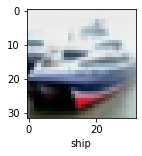

In [19]:
plot_sample(X_test, y_test,1)

In [20]:
classes[y_classes[1]]

'ship'